In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set visual style for the charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [9]:
# --- 1. LOAD DATA ---
# Make sure the file 'heart.csv' is in the same folder as this notebook
df = pd.read_csv('heart.csv')

# Display first few rows to check data
print("First 5 rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


/var/folders/s7/jxy5nj_92ms19pmy88kw45zm0000gn/T/ipykernel_21274/3762337850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='coolwarm')


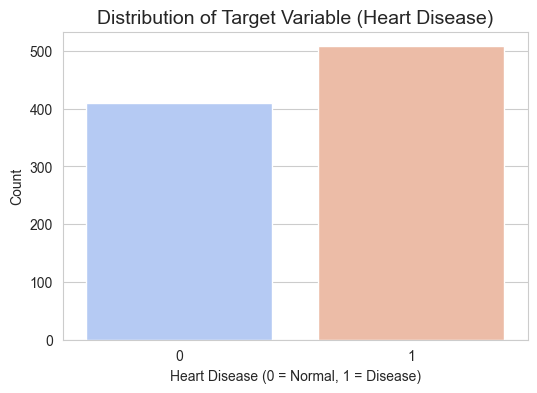

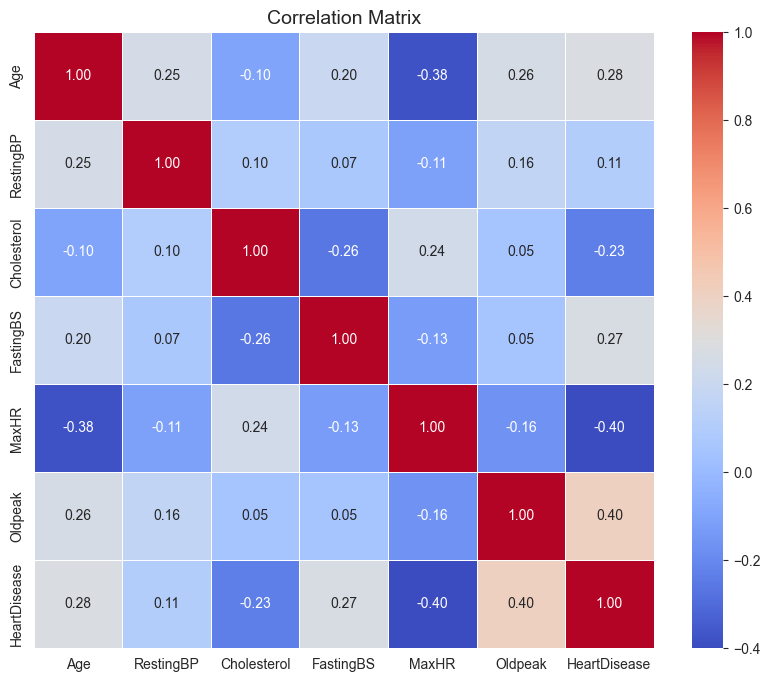

In [10]:
# --- 2. EXPLORATORY DATA ANALYSIS (EDA) ---

# Chart 1: Target Distribution (HeartDisease: 0 vs 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (Heart Disease)', fontsize=14)
plt.xlabel('Heart Disease (0 = Normal, 1 = Disease)')
plt.ylabel('Count')
plt.show()

# Chart 2: Correlation Heatmap (Numeric columns only)
# This helps check for multicollinearity (variables that are too similar)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [11]:
# --- 3. DATA PREPROCESSING ---

# Separate Features (X) and Target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert Categorical Variables to Numbers (One-Hot Encoding)
# We use drop_first=True to avoid multicollinearity (important for Logistic Regression)
X = pd.get_dummies(X, drop_first=True)

print("\nFeature columns after encoding:")
print(X.columns.tolist())

# Split Data into Training and Testing Sets (80% Train, 20% Test), with equal heart disease split to training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling (CRITICAL for Logistic Regression)
# Logistic Regression assumes features are on a similar scale (e.g., Age vs Cholesterol)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature columns after encoding:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']


In [12]:
# --- 4. MODEL TRAINING ---

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'



--- Logistical Regression Performance Metrics ---


,precision,recall,f1-score,support
Normal (0),0.906667,0.829268,0.866242,82.00000
Heart Disease (1),0.871560,0.931373,0.900474,102.00000
accuracy,0.885870,0.885870,0.885870,0.88587
macro avg,0.889113,0.880320,0.883358,184.00000
weighted avg,0.887205,0.885870,0.885218,184.00000


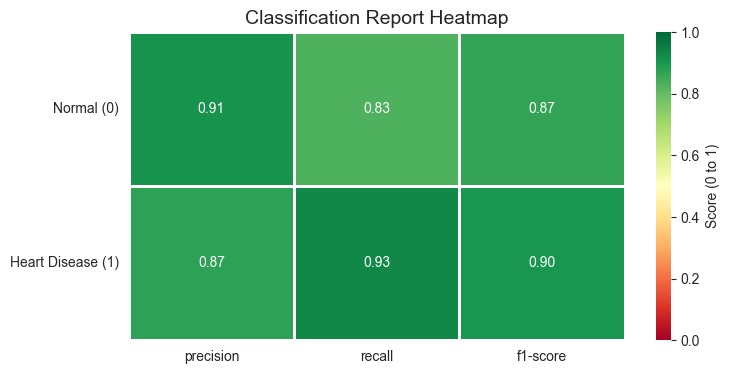

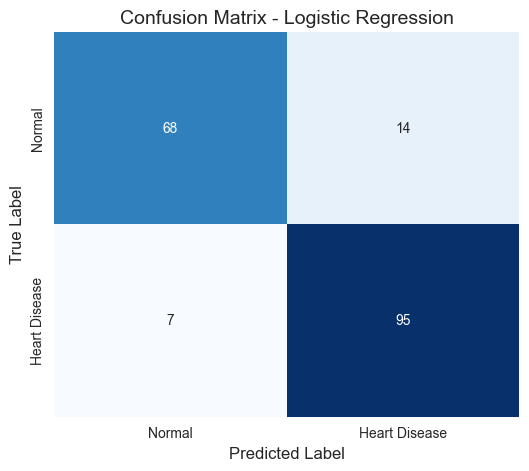

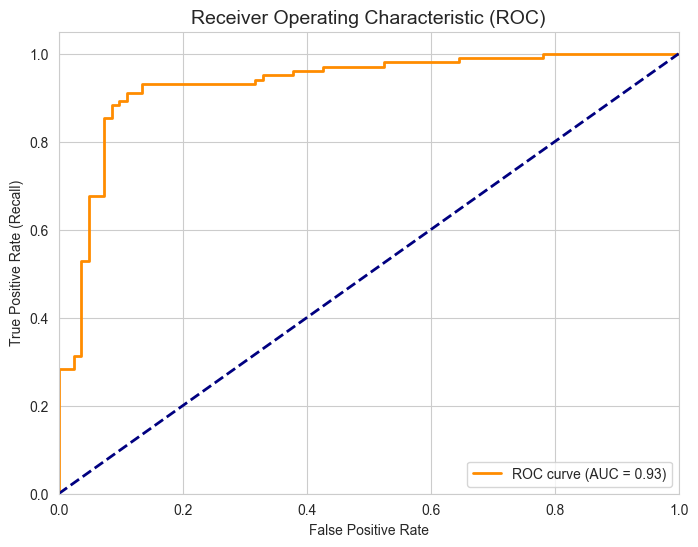

In [13]:
# --- 5. EVALUATION & RESULTS ---

# Make Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC Curve

# Print Text Metrics
# --- IMPROVED CLASSIFICATION REPORT ---

# Generate the report as a Dictionary (instead of a string)
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to a Pandas DataFrame for a clean table
report_df = pd.DataFrame(report_dict).transpose()

# Rename the rows to be Human Readable
# We rename '0' to 'Normal' and '1' to 'Heart Disease'
report_df.rename(index={'0': 'Normal (0)', '1': 'Heart Disease (1)'}, inplace=True)

# Display the Clean Table
print("\n--- Logistical Regression Performance Metrics ---")
display(report_df)

# --- VISUALIZE THE REPORT ---

# Drop the 'accuracy', 'macro avg', and 'weighted avg' rows for the heatmap
# so we just focus on the classes (Normal vs Heart Disease)
heatmap_data = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

# Drop the 'support' column because it's a count, not a percentage
heatmap_data = heatmap_data.drop('support', axis=1)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='RdYlGn', fmt='.2f',
            vmin=0, vmax=1, linewidths=1, cbar_kws={'label': 'Score (0 to 1)'})
plt.title('Classification Report Heatmap', fontsize=14)
plt.yticks(rotation=0) # Keep the y-axis labels horizontal
plt.show()


# Chart 3: Confusion Matrix
# Visualizes True Positives, False Positives, etc.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Heart Disease'],
            yticklabels=['Normal', 'Heart Disease'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.show()


# Chart 4: ROC Curve
# Shows the trade-off between Sensitivity and Specificity
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)', fontsize=14)
plt.legend(loc="lower right")
plt.show()

/var/folders/s7/jxy5nj_92ms19pmy88kw45zm0000gn/T/ipykernel_21274/774347524.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


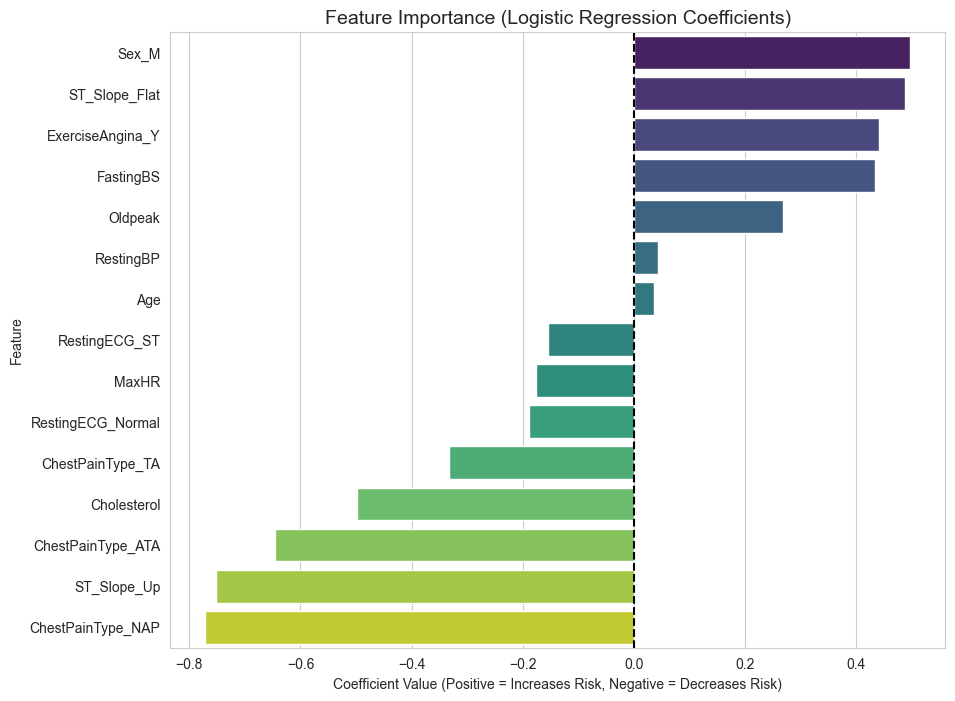

In [14]:
# Chart 5: Feature Importance (Coefficients)
# This tells you WHICH factors contribute most to the prediction
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)', fontsize=14)
plt.xlabel('Coefficient Value (Positive = Increases Risk, Negative = Decreases Risk)')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [15]:
# Get the coefficient for Sex_M
coef_male = log_reg.coef_[0][X.columns.get_loc('Sex_M')]

# Calculate the Odds Ratio
odds_ratio = np.exp(coef_male)

print(f"Coefficient for Sex_M: {coef_male:.4f}")
print(f"Odds Ratio (How many times more likely): {odds_ratio:.2f}")

Coefficient for Sex_M: 0.4974
Odds Ratio (How many times more likely): 1.64
